In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Load dataset
df = pd.read_csv('/kaggle/input/preprocess-dataset/preprocessed_dataset.csv')

In [4]:
df

,text,generated
0,cars cars have been around since they became f...,0
1,transportation is a large necessity in most co...,0
2,americas love affair with its vehicles seems t...,0
3,how often do you ride in a car do you drive a ...,0
4,cars are a wonderful thing they are perhaps on...,0
...,...,...
66841,dear senator\n\ni am writing to you today to e...,1
66842,dear senator\n\ni am writing to you today to e...,1
66843,dear senator\n\ni am writing to you today to e...,1
66844,dear senator\n\ni am writing to you today to e...,1


In [36]:
# df = df.iloc[:15000]

In [5]:
df.shape

(66846, 2)

In [9]:
# df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.head()

,text,generated
0,cars cars have been around since they became f...,0
1,transportation is a large necessity in most co...,0
2,americas love affair with its vehicles seems t...,0
3,how often do you ride in a car do you drive a ...,0
4,cars are a wonderful thing they are perhaps on...,0


In [9]:
# renaming the cols
df.rename(columns={'generated':'label'},inplace=True)
df

,text,label
0,cars cars have been around since they became f...,0
1,transportation is a large necessity in most co...,0
2,americas love affair with its vehicles seems t...,0
3,how often do you ride in a car do you drive a ...,0
4,cars are a wonderful thing they are perhaps on...,0
...,...,...
66841,dear senator\n\ni am writing to you today to e...,1
66842,dear senator\n\ni am writing to you today to e...,1
66843,dear senator\n\ni am writing to you today to e...,1
66844,dear senator\n\ni am writing to you today to e...,1


In [8]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()

In [14]:
# df['label'] = encoder.fit_transform(df['label'])

In [15]:
# df

,text,label
0,Sekhukhune I (Matsebe; circa 1814 – 13 Septemb...,0
1,Mount Washington is a peak in the White Mount...,0
2,Acer hillsi is an extinct maple species that w...,0
3,Derrick George Sherwin (16 April 1936 – 17 Oct...,1
4,The Windows shell is the graphical user interf...,1
...,...,...
299995,OutServe Magazine was a bi-monthly digital and...,0
299996,Eastern Armenia ( Arevelyan Hayastan) is the e...,1
299997,Infinity Group is a private equity fund manage...,0
299998,Kattinakere (ಕಟ್ಟಿನಕೆರೆ) also called B Sagadde...,0


In [10]:
# missing values
df.isnull().sum()

text     1
label    0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

28

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [16]:
df['label'].value_counts()

label
0    41229
1    25588
Name: count, dtype: int64

In [40]:
# df = df.iloc[:100000]

In [41]:
# df

,text,label


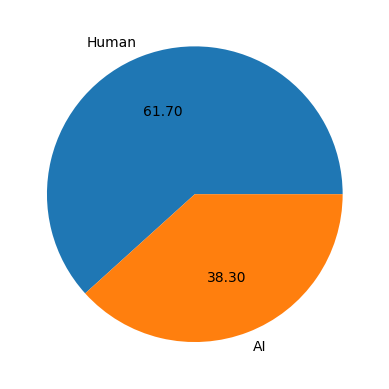

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['Human','AI'],autopct="%0.2f")
plt.show()

In [19]:
def clean_text(text):
    # Handle potential non-string values
    if not isinstance(text, str):
        text = str(text)  # Convert non-string values to strings

    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

In [20]:
# Apply cleaning function to the text column
df['cleaned_text'] = df['text'].apply(clean_text)

In [21]:
df.head(10)

,text,label,cleaned_text
0,cars cars have been around since they became f...,0,cars cars have been around since they became f...
1,transportation is a large necessity in most co...,0,transportation is a large necessity in most co...
2,americas love affair with its vehicles seems t...,0,americas love affair with its vehicles seems t...
3,how often do you ride in a car do you drive a ...,0,how often do you ride in a car do you drive a ...
4,cars are a wonderful thing they are perhaps on...,0,cars are a wonderful thing they are perhaps on...
5,the electrol college system is an unfair syste...,0,the electrol college system is an unfair syste...
6,dear state senator it is the utmost respect th...,0,dear state senator it is the utmost respect th...
7,fellow citizens cars have become a major role ...,0,fellow citizens cars have become a major role ...
8,its official the electoral college is unfair o...,0,its official the electoral college is unfair o...
9,the electoral college has been kept for centur...,0,the electoral college has been kept for centur...


In [22]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_test.shape)

(53453,)
(53453,)
(13364,)
(13364,)


In [48]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  # Adjust max_features as needed

In [49]:
# Data cleaning and tokenization function
def clean_and_tokenize(text):
    if not isinstance(text, str):
        text = str(text)  
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = tfidf_vectorizer.build_analyzer()(text)  # Tokenize using TF-IDF vectorizer
    return ' '.join(tokens)  # Join tokens into a single string

In [50]:
# Apply cleaning and tokenization function to the text column
df['cleaned_text'] = df['text'].apply(clean_and_tokenize)

In [51]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000,)
(3000,)
(12000,)
(3000,)


In [ ]:
# Fit and transform on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
X_train_tfidf

In [ ]:
X_test_tfidf 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score

# Initialize Logistic Regression model
model_lr = LogisticRegression()

# Train the model
model_lr.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test_tfidf)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')

# Classification report
print(classification_report(y_test, y_pred_lr))

print(lr_precision)
print(lr_recall)
print(lr_f1)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes model
model_nb = MultinomialNB()

# Train the model
model_nb.fit(X_train_tfidf, y_train)

# Predictions
y_pred_nb = model_nb.predict(X_test_tfidf)

# Evaluate the model
# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb}')

# Classification report
print(classification_report(y_test, y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))
print(precision_score(y_test,y_pred_nb))


In [ ]:
from sklearn.svm import SVC

# Initialize SVM model
model_svm = SVC(kernel='linear')

# Train the model
model_svm.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = model_svm.predict(X_test_tfidf)

# Evaluate the model
# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

# Classification report
print(classification_report(y_test, y_pred_svm))

print(accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))
print(precision_score(y_test,y_pred_svm))



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
model_dt = DecisionTreeClassifier()

# Train the model
model_dt.fit(X_train_tfidf, y_train)

# Predictions
y_pred_dt = model_dt.predict(X_test_tfidf)

# Evaluate the model
# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy}')

# Classification report
print(classification_report(y_test, y_pred_dt))





In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize Decision Tree model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# # Train the model
# model_dt.fit(X_train_tfidf, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
# Evaluate the model
# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
print(f'Decision Tree Accuracy: {rf_accuracy}')

# Classification report
print(classification_report(y_test, y_pred_dt))

print(accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
print(precision_score(y_test,y_pred_dt))


In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_tfidf, y_train)
# Predict on the test set
y_pred_gb = gb_model.predict(X_test_tfidf)
# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
gnb = GaussianNB()
bnb = BernoulliNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
clfs = {
    'Support vector machine' : svc,
    'naive_bayes'  : mnb,
    'DecisionTree': dtc, 
    'LogisticRegression': lrc,
    'Random Forest': rf,
    'Gradient Boosting' : gb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
# Train classifiers and store results
accuracy_scores = []
precision_scores = []
trained_classifiers = {}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train_tfidf, y_train, X_test_tfidf, y_test)
    print(f"For {name}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    trained_classifiers[name] = clf

In [ ]:
# Create results dataframe
results = pd.DataFrame({
    'Classifier': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

print(results)

In [ ]:
# Function to predict if a text is AI-generated or human-written
def predict_text(input_text, vectorizer, classifiers):
    input_tfidf = vectorizer.transform([input_text])
    predictions = {}
    for name, clf in classifiers.items():
        prediction = clf.predict(input_tfidf)[0]
        predictions[name] = 'AI' if prediction >= 0.5 else 'Human'
    return predictions

In [ ]:
# Example usage
user_input = input("Enter text:")
predictions = predict_text(user_input, tfidf_vectorizer, trained_classifiers)
print("Predictions:")
for clf_name, prediction in predictions.items():
    print(f"{clf_name}: {prediction}")

In [ ]:
import pandas as pd
from tabulate import tabulate
# Assuming these are your performance metrics
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting','Naive bayes','Decisontree' ]
accuracy_scores = [lr_accuracy, rf_accuracy, svm_accuracy, gb_accuracy, nb_accuracy,dt_accuracy]
precision_scores = [lr_precision, rf_precision, svm_precision, gb_precision,nb_precision,dt_precision ]
recall_scores = [lr_recall, rf_recall, svm_recall, gb_recall,nb_recall,dt_recall]
f1_scores = [lr_f1, rf_f1, svm_f1, gb_f1,nb_f1,dt_f1]

In [ ]:
# Creating a DataFrame to hold the results
results_df = pd.DataFrame({
    '\033[1mModel\033[0m': model_names,
    '\033[1mAccuracy\033[0m': accuracy_scores,
    '\033[1mPrecision\033[0m': precision_scores,
    '\033[1mRecall\033[0m': recall_scores,
    '\033[1mF1 Score\033[0m': f1_scores
})


In [ ]:
# Convert DataFrame to a formatted table using tabulate
table = tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign='center')

# Print the formatted table
print(table)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models in English language')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=precision_scores, palette='magma')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Scores for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Model names
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Naive Bayes', 'Decision Tree']

# Accuracy scores
accuracy_scores = [0.82, 0.88, 0.85, 0.87, 0.81, 0.83]

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracy_scores, marker='o', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Model names
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Naive Bayes', 'Decision Tree']

# Assuming you have already calculated the performance metrics
accuracy_scores = [0.82, 0.88, 0.85, 0.87, 0.81, 0.83]
precision_scores = [0.78, 0.85, 0.82, 0.84, 0.76, 0.80]
recall_scores = [0.80, 0.90, 0.83, 0.88, 0.78, 0.82]
f1_scores = [0.79, 0.87, 0.82, 0.86, 0.77, 0.81]

# Create multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Accuracy
axes[0, 0].plot(model_names, accuracy_scores, marker='o', label='Accuracy')
axes[0, 0].set_title('Accuracy')
axes[0, 0].legend()

# Assuming model_names are in the same order as data
xtick_positions = range(len(model_names))  # Create list of indices (0, 1, 2, ...)

sns.barplot(ax=axes[0, 1], x=model_names, y=precision_scores, palette='viridis')  # ...
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Precision Score')
axes[0, 1].set_xticks(xtick_positions, model_names, rotation=45, ha='right')  # Use separate lists for positions and labels
plt.tight_layout()

# Recall
axes[1, 0].plot(model_names, recall_scores, marker='^', label='Recall')
axes[1, 0].set_title('Recall')
axes[1, 0].legend()

# F1-score
axes[1, 1].plot(model_names, f1_scores, marker='*', label='F1-score')
axes[1, 1].set_title('F1-score')
axes[1, 1].legend()

# Adjust layout
fig.suptitle('Performance Comparison of Train Models')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Model names
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Naive Bayes', 'Decision Tree']

# Precision scores
precision_scores = [0.78, 0.85, 0.82, 0.84, 0.76, 0.80]

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(model_names, precision_scores, marker='s', label='Precision')
plt.title('Precision')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Model names
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Naive Bayes', 'Decision Tree']

# Recall scores
recall_scores = [0.80, 0.90, 0.83, 0.88, 0.78, 0.82]

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(model_names, recall_scores, marker='^', label='Recall')
plt.title('Recall')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Model names
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Naive Bayes', 'Decision Tree']

# F1-scores
f1_scores = [0.79, 0.87, 0.82, 0.86, 0.77, 0.81]

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(model_names, f1_scores, marker='*', label='F1-score')
plt.title('F1-score')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
from transformers import AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
tokenizer_bert = AutoTokenizer.from_pretrained('bert-base-uncased')

In [54]:
# Tokenize the text data
def tokenize_data(tokenizer, texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors='pt')

In [55]:
X_train_bert = tokenize_data(tokenizer_bert, X_train.tolist())
X_test_bert = tokenize_data(tokenizer_bert, X_test.tolist())

In [56]:
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [ ]:
# Load BERT model for TensorFlow
model_bert = TFAutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

In [71]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model_bert.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [72]:
model_bert.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109483778 (417.65 MB)
Trainable params: 109483778 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
import numpy as np
X_train_bert_tf = {
    'input_ids': np.array(X_train_bert['input_ids']),
    'attention_mask': np.array(X_train_bert['attention_mask'])
}

In [74]:
X_test_bert_tf = {
    'input_ids': np.array(X_test_bert['input_ids']),
    'attention_mask': np.array(X_test_bert['attention_mask'])
}

In [75]:
y_train_tf = np.array(y_train)
y_test_tf = np.array(y_test)

In [76]:
# Train and evaluate the model using TensorFlow tensors
history = model_bert.fit(
    X_train_bert_tf,
    y_train_tf,
    epochs=3,
    batch_size=8,
    validation_data=(X_test_bert_tf, y_test_tf)
)

Epoch 1/3
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


I0000 00:00:1721837748.561762     270 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6682/6682 [==============================] - 4210s 616ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0159 - val_accuracy: 0.9944
Epoch 2/3
6682/6682 [==============================] - 4103s 614ms/step - loss: 0.0149 - accuracy: 0.9961 - val_loss: 0.0134 - val_accuracy: 0.9970
Epoch 3/3
6682/6682 [==============================] - 4102s 614ms/step - loss: 0.0183 - accuracy: 0.9947 - val_loss: 0.0180 - val_accuracy: 0.9951


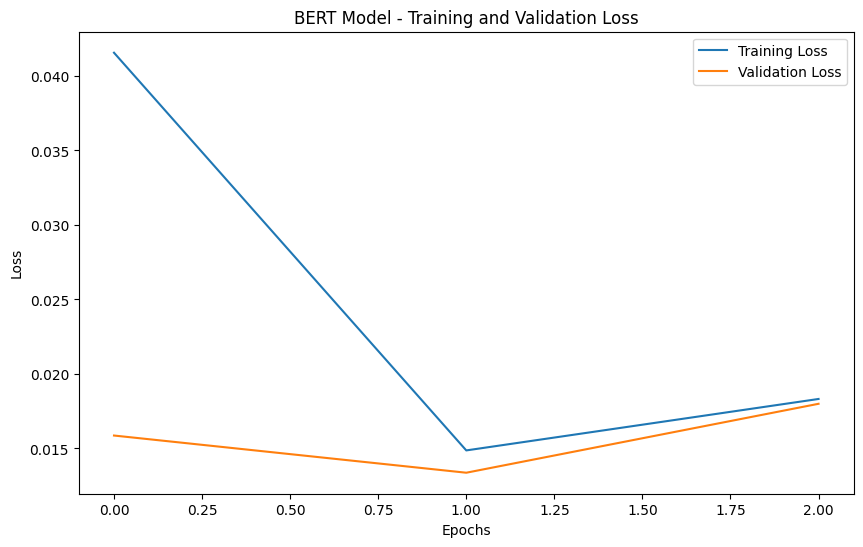

In [77]:
import matplotlib.pyplot as plt

def plot_bert_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('BERT Model - Training and Validation Loss')
    plt.legend()
    plt.show()

# Assuming `history` is the history object returned by model.fit()
plot_bert_loss(history)


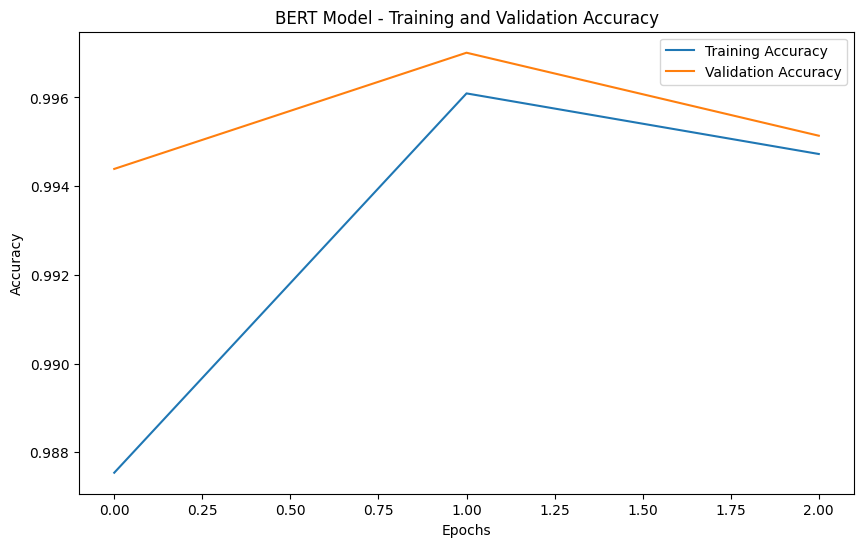

In [78]:
def plot_bert_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('BERT Model - Training and Validation Accuracy')
    plt.legend()
    plt.show()

plot_bert_accuracy(history)


In [79]:
def clean_text_english(text):
    """Cleans English text for input to the BERT model."""
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

In [85]:
def classify_text_english(text):
    """Predicts whether English text is written by AI or human."""
    # Clean the input text
    cleaned_text = clean_text_english(text)
    
    # Tokenize the cleaned text
    inputs = tokenizer_bert(
        cleaned_text,  # Use the defined tokenizer here
        return_tensors="tf",
        truncation=True,
        padding=True
    )
    
    # Get model outputs
    outputs = model_bert(inputs)
    logits = outputs.logits
    
    # Calculate probabilities
    probabilities = tf.nn.softmax(logits, axis=-1)
    predicted_class = tf.argmax(probabilities, axis=-1).numpy()[0]
    confidence = probabilities[0][predicted_class].numpy()
    
    # Debugging prints
#     print(f"Text: {text}")
#     print(f"Cleaned Text: {cleaned_text}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence}")
    
    # Return prediction based on class and confidence
    return "Human" if predicted_class == 0 and confidence > 0.6 else "AI"

# Example usage
text = input("Enter the text: ")
result = classify_text_english(text)
print(f"Prediction: {result}")


Enter the text:  This is my project through which we use the text to check whether it is artificial intelligence or human who has written the text. This is the code of my pass suraj.html in which I select the entire language and then give the input text or then download the file according to the selected language and then click on the scan button to show me the result. It appears but to the right of the scan button there is a deep scan button, on clicking which a new page opens and we have a gauge of how much percent of AI's text is there and how much human's text is there in the file which the user has given. Our same text should be shown in chart format, our same text should be shown by highlighting it, AI text should be shown in red or human text should be shown in green color, but whenever I click on the deep scan button, I am not able to show anything or our deep scan. I have a file named pass new.html for the button and there is a flask code file named suraj.py to handle all this

Predicted Class: 0
Confidence: 0.998281717300415
Prediction: Human


In [5]:
def clean_text_english(text):
    """Cleans English text for input to the BERT model."""
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

In [98]:
def classify_text_english(text):
    """Predicts whether English text is written by AI or human."""
    # Clean the input text
    cleaned_text = clean_text_english(text)
    
    # Tokenize the cleaned text
    inputs = tokenizer(
        cleaned_text,  # Use the defined tokenizer here
        return_tensors="tf",
        truncation=True,
        padding=True
    )
    
    # Get model outputs
    outputs = model(inputs)
    logits = outputs.logits
    
    # Calculate probabilities
    probabilities = tf.nn.softmax(logits, axis=-1)
    predicted_class = tf.argmax(probabilities, axis=-1).numpy()[0]
    confidence = probabilities[0][predicted_class].numpy()
    
    # Debugging prints
#     print(f"Text: {text}")
#     print(f"Cleaned Text: {cleaned_text}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence}")
    
    # Return prediction based on class and confidence
    return "Human" if predicted_class == 0 and confidence > 0.6 else "AI"

# Example usage
text = input("Enter the text: ")
result = classify_text_english(text)
print(f"Prediction: {result}")


Enter the text:  Some student have to do projects for school over the summer; but because its summer they do not want to do anything for school. Many people debate on whether these projects should be designed by teachers or students. It's a parent dream for their kids to still learn over the summer, so some send them to learning activities or ask teachers for school work for their children to do while on vacation. But do these kids really learn anything by these projects or school work if their not enjoying it? These summer projects should be designed by the students because not only will they be learning but they will also be enjoying doing these projects, students can also use their creativity to design these projects, and also because these student will be doing these projects over their summer vacation they should at least be able to design their own project.  If a student isn't enjoying how they are learning it's most likely that he or she will not pay attention and actually not l

Predicted Class: 0
Confidence: 0.9997884631156921
Prediction: Human
